# Heart Rate Signals processing (2D)

From the Kaggle Dataset containing health indicators via smart watches, we process the Heart Rate
Timeseries of all the users simultaneously. Speciffically, we will perform a high-pass filtering
and we will plot the spectrograms (simultaneously) and plot the signals and spectrograms at each
stage.

## Step 1: Initialization

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from caits import visualization, filtering
from caits.fe import _spectrum

In [3]:
def longest_valid_stretch(series):
    """
    Returns the length of the longest stretch of valid values (not NaN) in a series.
    """
    is_valid = series.notna().astype(int)
    return (is_valid.groupby((is_valid != is_valid.shift()).cumsum())
            .transform('size') * is_valid).max()

In [4]:
# Load and parse Heart Rates Dataset
data = pd.read_csv("./data/Fitabase_Data_3.12.16-4.11.16/heartrate_seconds_merged.csv")

reshaped_data = data.pivot(index="Time", columns="Id", values="Value")
reshaped_data.shape

(510597, 14)

In [5]:
reshaped_data.head()


Id,2022484408,2026352035,2347167796,4020332650,4558609924,5553957443,5577150313,6117666160,6391747486,6775888955,6962181067,7007744171,8792009665,8877689391
Time,,,,,,,,,,,,,,
3/29/2016 10:00:00 AM,NaN,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/29/2016 10:00:05 PM,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/29/2016 10:00:10 PM,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/29/2016 10:00:15 AM,NaN,NaN,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/29/2016 10:00:15 PM,NaN,NaN,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
def parse_data(reshaped_data):
    longest_stretches = reshaped_data.apply(longest_valid_stretch)

    # Filter columns with stretches above a threshold (e.g., 100 samples)
    threshold = 50
    selected_columns = longest_stretches[longest_stretches >= threshold].index

    # Keep only selected columns and fill NaNs with 0
    filtered_vals = reshaped_data[selected_columns].fillna(0)
    filtered_vals.index = range(len(filtered_vals))

    return filtered_vals

filtered_vals = parse_data(reshaped_data)
filtered_vals.shape


/tmp/ipykernel_17367/1229926498.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (is_valid.groupby((is_valid != is_valid.shift()).cumsum())
/tmp/ipykernel_17367/1229926498.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (is_valid.groupby((is_valid != is_valid.shift()).cumsum())
/tmp/ipykernel_17367/1229926498.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return (is_valid.groupby((is_valid != is_valid.shift

(510597, 3)

In [7]:
filtered_vals.head()


Id,2022484408,2347167796,6962181067
0,0.0,65.0,0.0
1,0.0,67.0,0.0
2,0.0,67.0,0.0
3,0.0,68.0,0.0
4,0.0,67.0,0.0


### Plot the chosen Heart Rate Signals

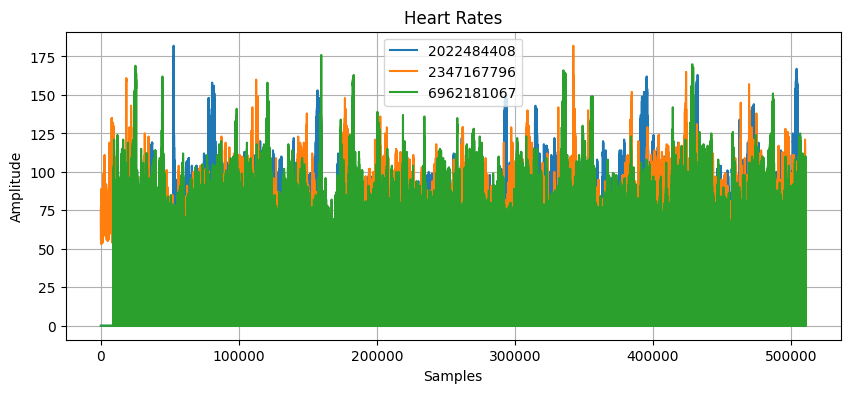

In [8]:
init_fig = visualization.plot_signal(
    filtered_vals.values,
    channels=filtered_vals.columns.tolist(),
    title="Heart Rates"
)

## Step 2: Spectrograms

Calculate the spectrogram for each signal and plot it

In [9]:
spectrograms, sr = _spectrum.spectrogram(
    y=filtered_vals.values.T,
    n_fft=2048,
    hop_length=512
)

In [10]:
f = np.fft.rfftfreq(sr, 1 / sr)
x = np.arange(spectrograms[0, :, :].shape[1]) * 512 / sr



/home/kirk/PycharmProjects/crossai-ts/caits/visualization.py:267: RuntimeWarning: divide by zero encountered in log10
  spec_plot = factor * np.log10(spec)  # Convert to dB: 10 * log10(spec)


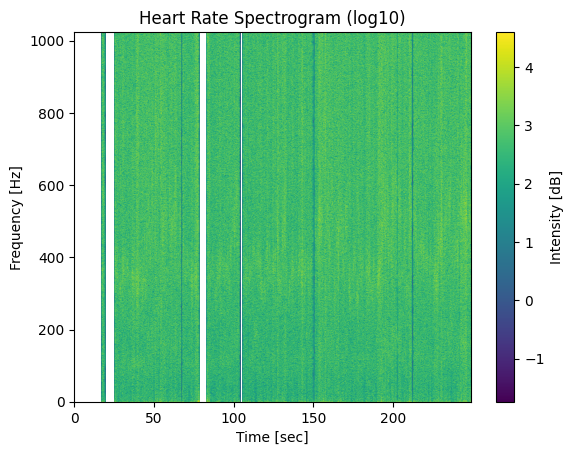

In [15]:
spectrogram_fig = visualization.plot_spectrogram(
    f=f,
    spec=spectrograms[0, :, :],
    t=x,
    log="log10",
    plot_title="Heart Rate Spectrogram (log10)"
)


/home/kirk/PycharmProjects/crossai-ts/caits/visualization.py:267: RuntimeWarning: divide by zero encountered in log10
  spec_plot = factor * np.log10(spec)  # Convert to dB: 10 * log10(spec)


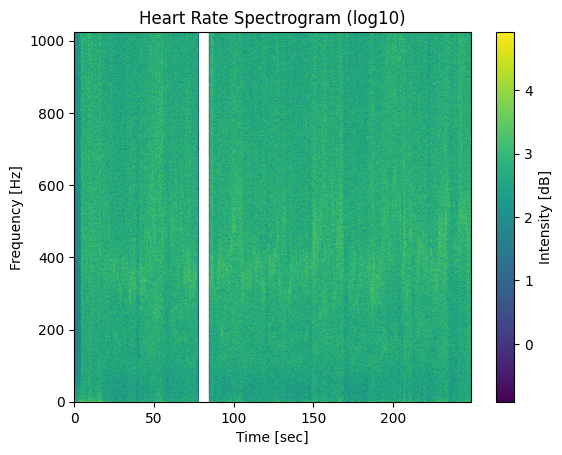

In [17]:
spectrogram_fig = visualization.plot_spectrogram(
    f=f,
    spec=spectrograms[1, :, :],
    t=x,
    log="log10",
    plot_title="Heart Rate Spectrogram (log10)"
)


/home/kirk/PycharmProjects/crossai-ts/caits/visualization.py:267: RuntimeWarning: divide by zero encountered in log10
  spec_plot = factor * np.log10(spec)  # Convert to dB: 10 * log10(spec)


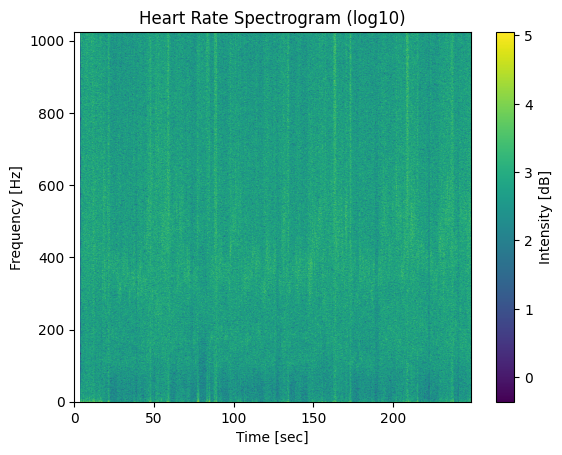

In [18]:
spectrogram_fig = visualization.plot_spectrogram(
    f=f,
    spec=spectrograms[2, :, :],
    t=x,
    log="log10",
    plot_title="Heart Rate Spectrogram (log10)"
)


## Step 3: Filtering

Use a High-Pass filter or the signals, using Butterworth Filter, and plot signal

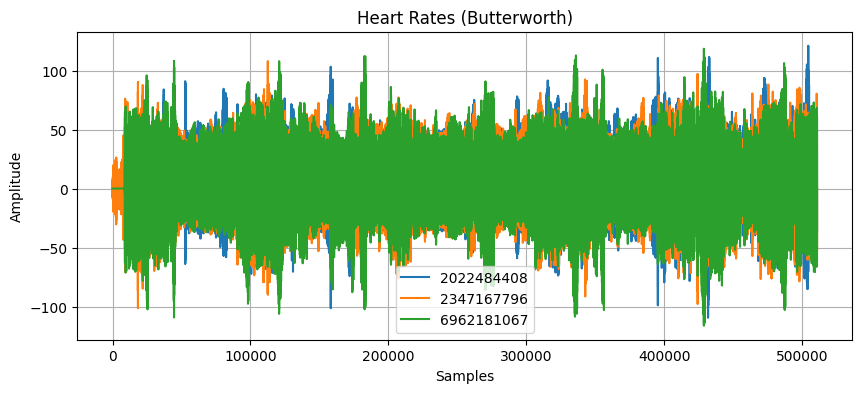

In [19]:
filtered_sigs = filtering.filter_butterworth(
    filtered_vals.values,
    fs=1,
    filter_type="highpass",
    cutoff_freq=0.25)
butterworth_filt = visualization.plot_signal(
    filtered_sigs,
    channels=filtered_vals.columns.tolist(),
    title="Heart Rates (Butterworth)"
)

## Step 4: Spectrograms

For each filtered Heart Rate Signal, calculate and plot the spectrogram

In [20]:
spectrograms_filt, sr_filt = _spectrum.spectrogram(
    y=filtered_sigs.T,
    n_fft=2048,
    hop_length=512
)


In [21]:
f = np.fft.rfftfreq(sr, 1 / sr)
x = np.arange(spectrograms_filt[0, :, :].shape[1]) * 512 / sr




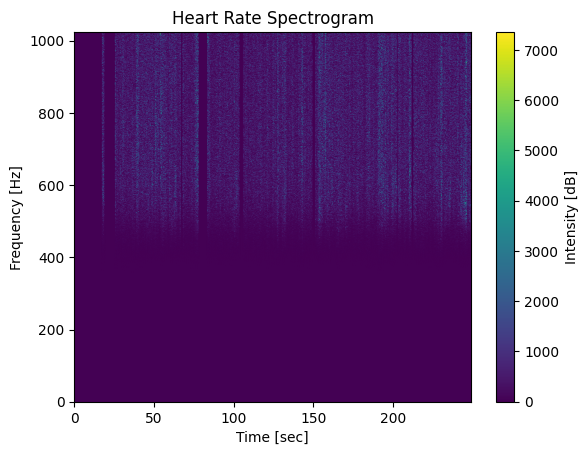

In [22]:
spectrogram_filt_fig = visualization.plot_spectrogram(
    f=f,
    spec=spectrograms_filt[0, :, :],
    t=x,
    plot_title="Heart Rate Spectrogram"
)


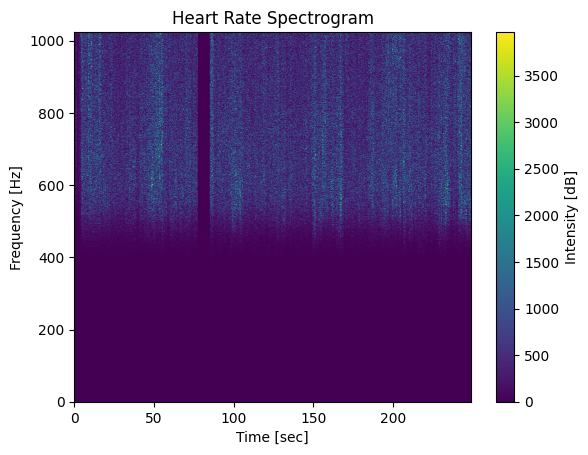

In [23]:
spectrogram_filt_fig = visualization.plot_spectrogram(
    f=f,
    spec=spectrograms_filt[1, :, :],
    t=x,
    plot_title="Heart Rate Spectrogram"
)


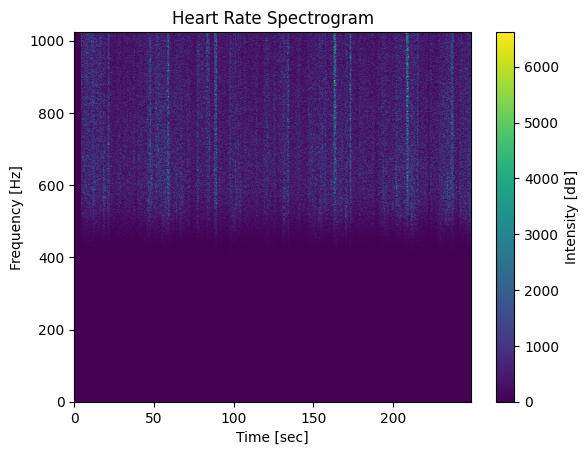

In [24]:
spectrogram_filt_fig = visualization.plot_spectrogram(
    f=f,
    spec=spectrograms_filt[2, :, :],
    t=x,
    plot_title="Heart Rate Spectrogram"
)


# Whole Process as a Pipeline

In [25]:
from caits.dataset import _dataset

dataset = _dataset.Dataset(
    X=[reshaped_data],
    y=["None"],
    id=["None"]
)

dataset

Dataset with 1 instances

In [26]:
from caits.transformers import _func_transformer_2d
from sklearn.pipeline import Pipeline


parser_func = _func_transformer_2d.FunctionTransformer2D(
    parse_data
)

filter_func = _func_transformer_2d.FunctionTransformer2D(
    func=filtering.filter_butterworth,
    filter_type="highpass",
    cutoff_freq=0.25,
    fs=1

)

pipe = Pipeline(
    [
        ("parse", parser_func),
        ("filter", filter_func)
    ]
)


filtered = pipe.fit_transform(dataset)

fig = visualization.plot_signal(
    filtered.X[0].values,
)


AttributeError: 'numpy.ndarray' object has no attribute 'apply'